In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
stop_words.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', '–', 'к', 'на'])

In [2]:
import json
def load_dataset(path):
    with open(path,"r") as f:
        return json.load(f)

In [3]:
dataset = load_dataset("data/final_dataset.json")
s = dataset.pop("university")

In [4]:
labels = ['sport','education',"science","startups","career"]
token2idx = {"sport":0,"education":1,"science":2,"startups":3,"career":4}

In [5]:
target = []
features = []
corpus = ['','','','','']
for cls,posts in dataset.items():
    for post in posts:
        target.append(cls)
        features.append(dataset[cls][post]['main_text'])
        corpus[token2idx[cls]] += ' '+dataset[cls][post]['main_text']

Для вычисления TfIdf статьи были сгруппированы  по классам в один текст.
Было это сделано, для того чтобы получить веса слов относительно класса, а не самой статьи.

In [6]:
tfidf = TfidfVectorizer(max_df=0.8,min_df=0.2,max_features=10000,stop_words=stop_words)

In [7]:
tfidf.fit(corpus)

TfidfVectorizer(max_df=0.8, max_features=10000, min_df=0.2,
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [9]:
logit = LogisticRegression(class_weight='balanced').fit(tfidf.transform(X_train), y_train)

In [10]:
y_pred = logit.predict(tfidf.transform(X_test))

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      career       0.73      0.48      0.58       126
   education       0.68      0.72      0.70       345
     science       0.72      0.74      0.73       218
       sport       0.76      0.87      0.81        39
    startups       0.69      0.72      0.71       173

    accuracy                           0.70       901
   macro avg       0.72      0.71      0.71       901
weighted avg       0.70      0.70      0.70       901



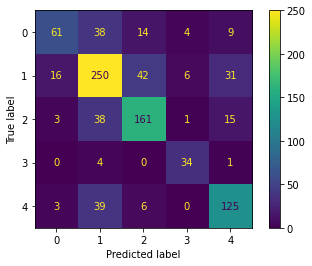

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()